In [20]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
#reading the  loan data
loan_data = pd.read_csv("loan.csv")

In [22]:
#Verify loan data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [23]:
loan_data.shape

(39717, 111)

In [24]:
# Check missing data percentage
loan_data.isnull().sum()/len(loan_data.index)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [25]:
#There are many columns with more than 90% of null data
null_90_pct = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 90]
loan_data = loan_data.drop(null_90_pct, axis=1)
loan_data.isnull().sum()/len(loan_data.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [26]:
loan_data.shape

(39717, 55)

In [27]:
#After Cleaning we have 55 columns

# Standardise data

Now we have 55 clumns and some of the columns are not really relevant for decision on loan approval.

 

In [28]:
coln_remove=["id",
  "member_id",
  "title",
  "url",
  "zip_code",
  "addr_state",
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  "collections_12_mths_ex_med",
  "acc_now_delinq",
  "chargeoff_within_12_mths",
  "delinq_amnt",
  "tax_liens",
  "policy_code"
]
loan_data=loan_data.drop(coln_remove, axis = 1)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

In [29]:
loan_data.shape

(39717, 22)

In [30]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [31]:
#The loan Status Current indicates,the loan repayment is currently in progress which will not influence the decision
# Filter loan_status not in Current
loan_data = loan_data[loan_data.loan_status != "Current"]

In [32]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [33]:
#Check data types
loan_data.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
pymnt_plan                 object
desc                       object
purpose                    object
dti                       float64
mths_since_last_delinq    float64
initial_list_status        object
pub_rec_bankruptcies      float64
dtype: object

In [34]:
# Some of the data which were xepected to be integer/float are in character format. Convert them
# converting loan_status to integer type

loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [35]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  float64
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_title               36191 non-null  object 
 9   emp_length              37544 non-null  object 
 10  home_ownership          38577 non-null  object 
 11  annual_inc              38577 non-null  float64
 12  verification_status     38577 non-null  object 
 13  issue_d                 38577 non-null  object 
 14  loan_status             38577 non-null  obj

## Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

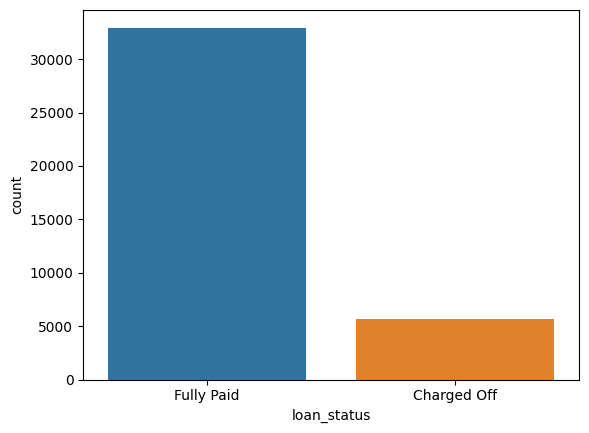

In [36]:
sns.countplot(x = 'loan_status', data = loan_data)

<function matplotlib.pyplot.show(close=None, block=None)>

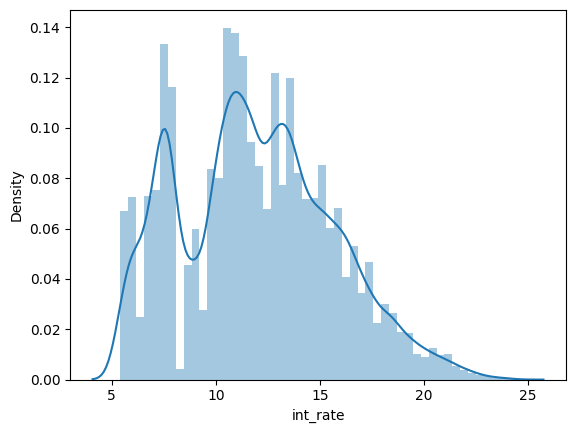

In [37]:
sns.distplot(loan_data['int_rate'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

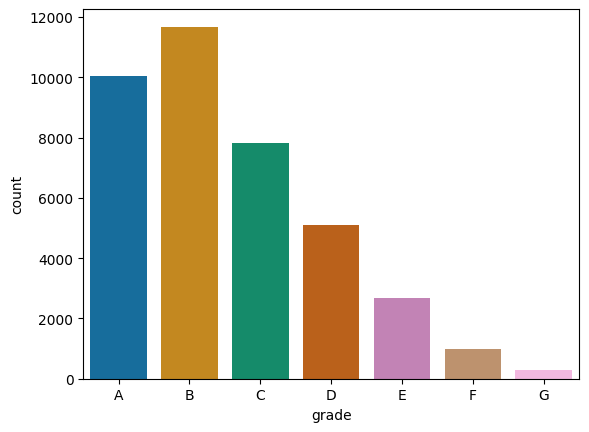

In [40]:
#loan_data["grade"] = loan_data["grade"].astype("category")
sns.countplot(data=loan_data,x="grade")
plt.show

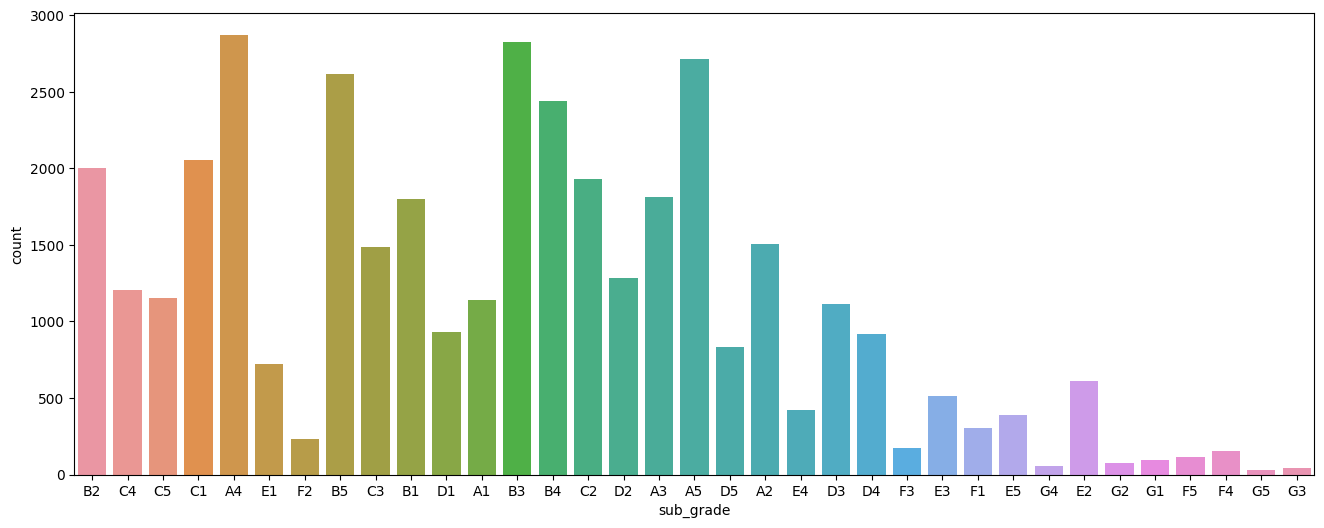

In [41]:
plt.figure(figsize=(16, 6))
sns.countplot(data=loan_data,x="sub_grade")
plt.show()

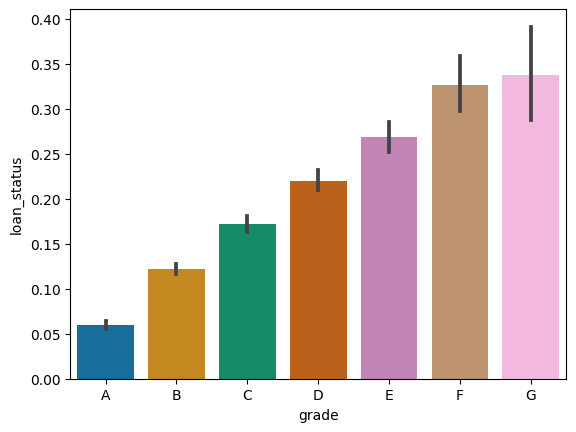

In [43]:
#Bivariate analysis: Analyze loan status and grade
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))
loan_data['loan_status'] = loan_data['loan_status'].astype('int64')
sns.barplot(x='grade', y='loan_status', data=loan_data)
plt.show()

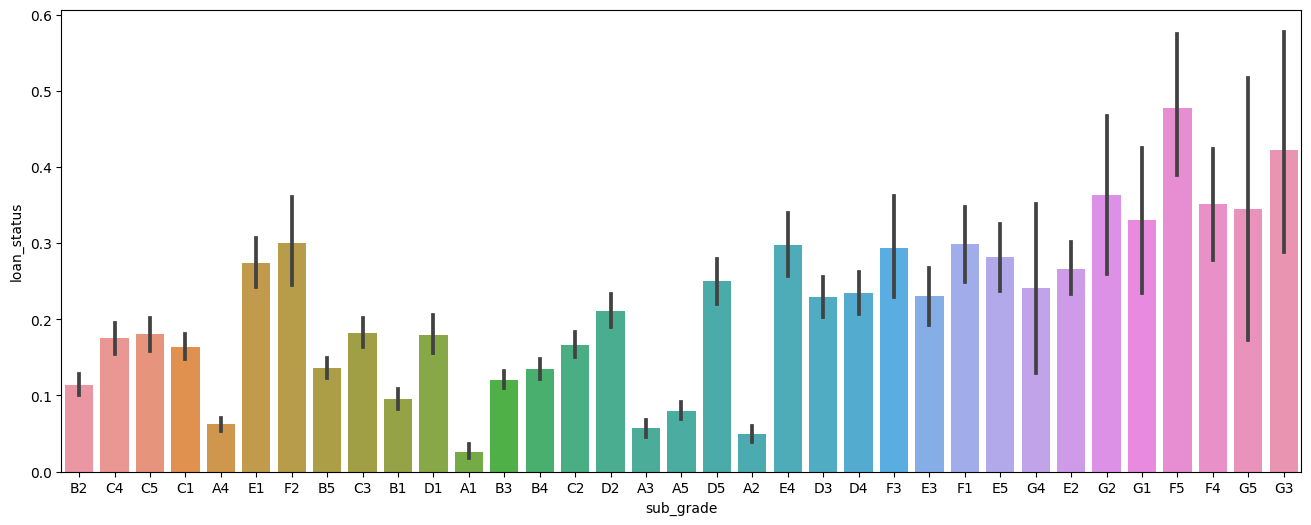

In [44]:
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=loan_data)
plt.show()

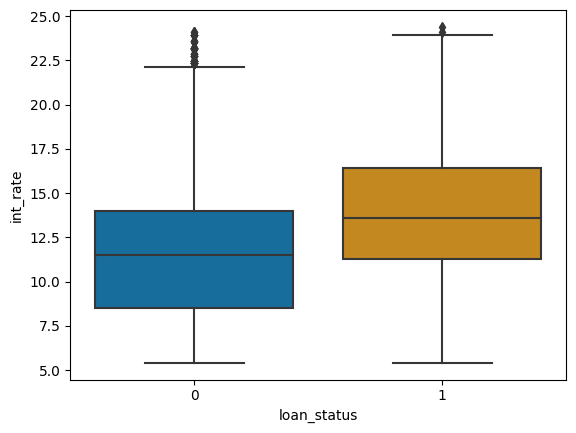

In [45]:
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=loan_data)
plt.show()

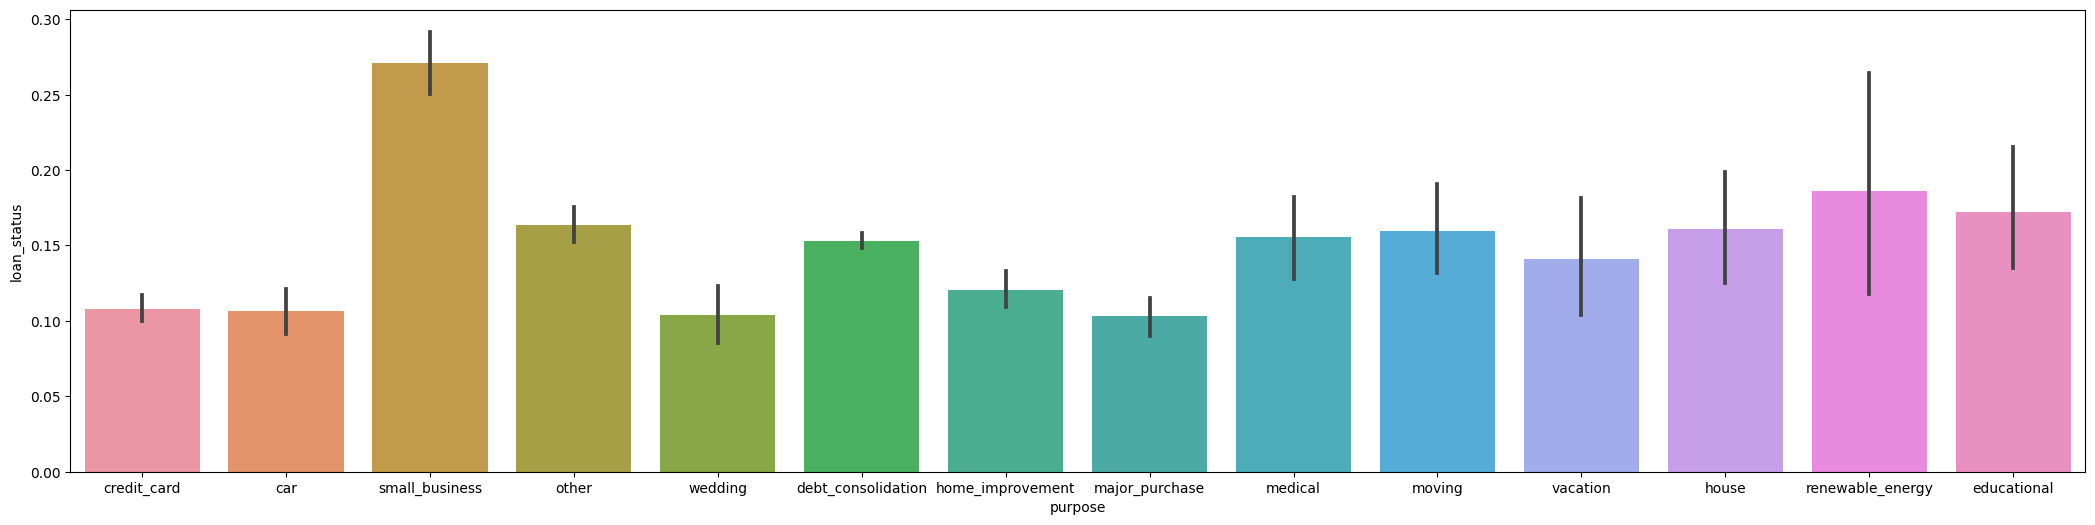

In [46]:
plt.figure(figsize=(26, 6))
sns.barplot(x='purpose', y='loan_status', data=loan_data)
plt.show()

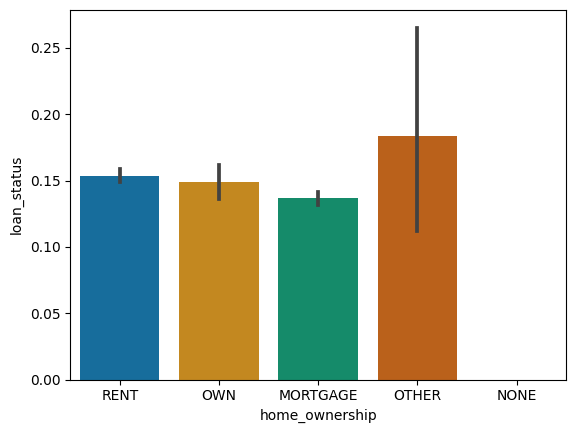

In [47]:
sns.barplot(x='home_ownership', y='loan_status', data=loan_data)
plt.show()

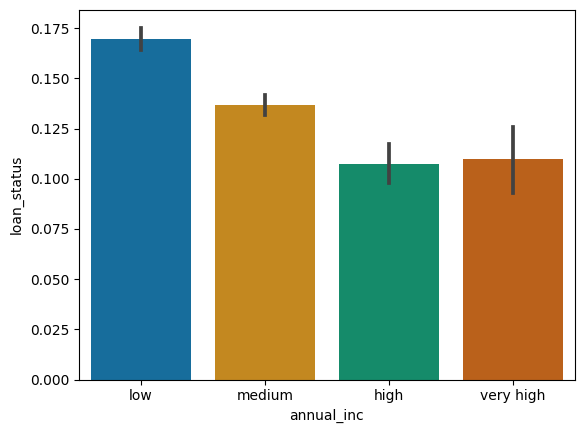

In [48]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan_data['annual_inc'] = loan_data['annual_inc'].apply(lambda x: annual_income(x))
sns.barplot(x='annual_inc', y='loan_status', data=loan_data)
plt.show()

In [50]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan_data)
    plt.show()

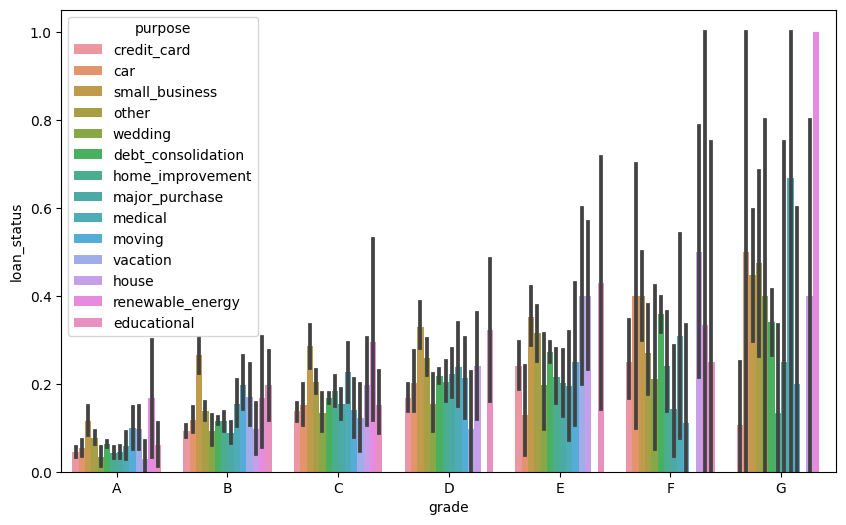

In [51]:
plot_segmented('grade')

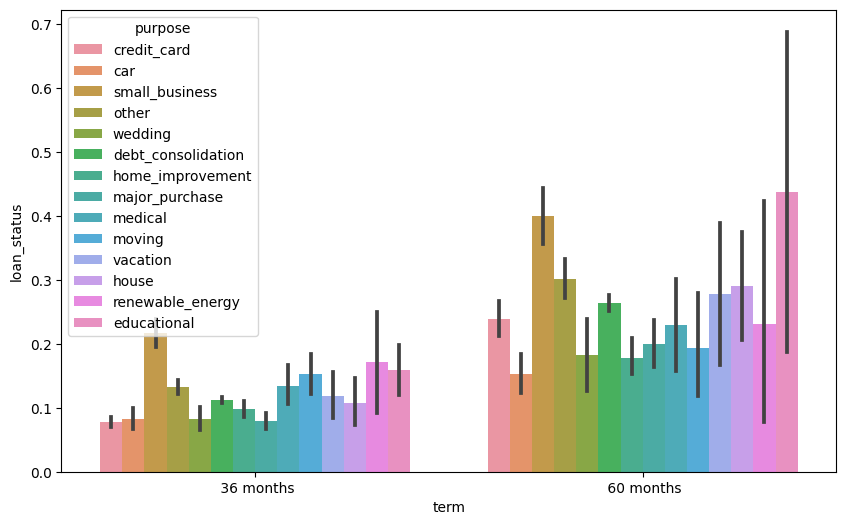

In [52]:
plot_segmented('term')

In [59]:

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: int_rate(x))


main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan_data = loan_data[loan_data['purpose'].isin(main_purposes)]
loan_data['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: count, dtype: int64

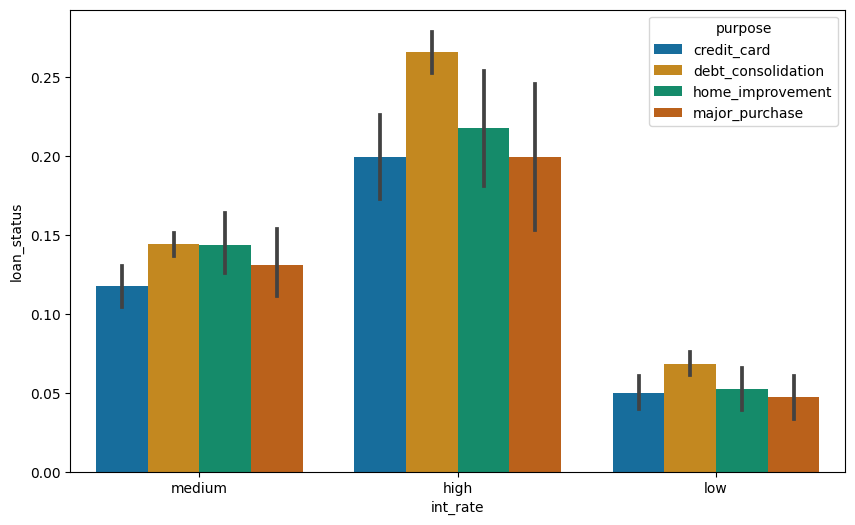

In [60]:
plot_segmented('int_rate')

In [61]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan_data['installment'] = loan_data['installment'].apply(lambda x: installment(x))

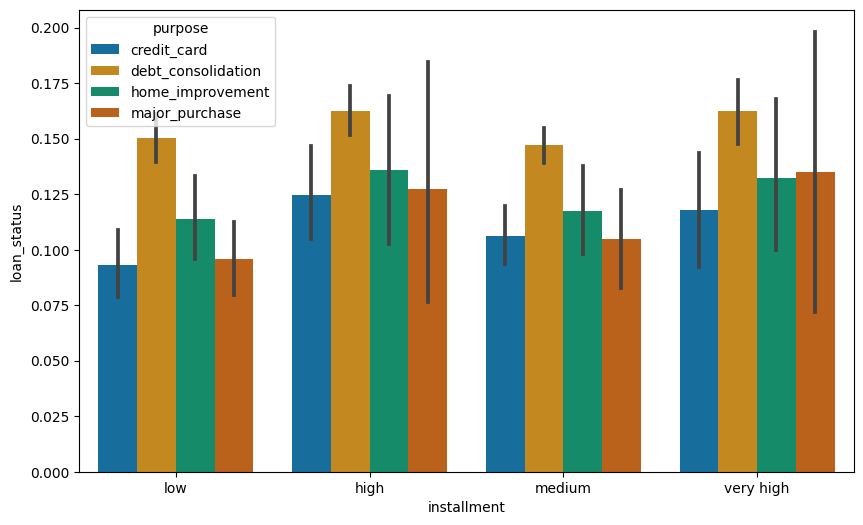

In [62]:
plot_segmented('installment')

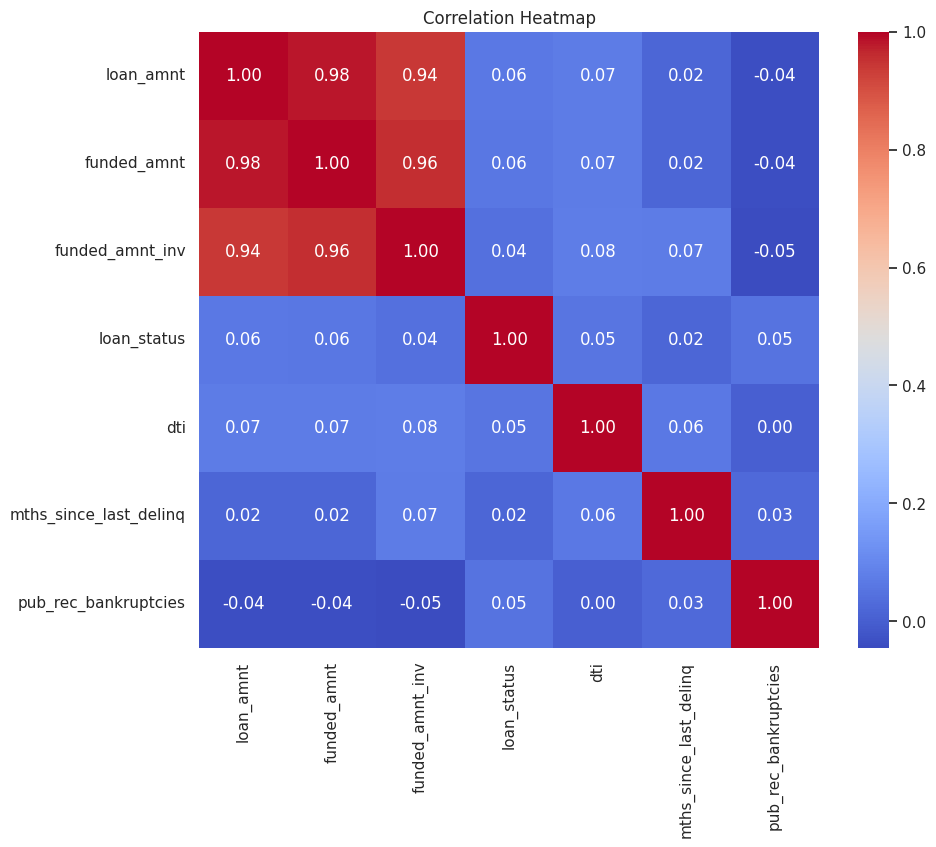

In [63]:
numeric_columns = loan_data.select_dtypes(include=[np.number])  # Select numeric columns
correlation_matrix = numeric_columns.corr()  # Calculate the correlation matrix
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Conclusion

### Univariate Analysis
* Loan status of fully paid is greater than charged off.
* Majority of Loan accounts  range b/w 5k to 20k
* Grades A,B, C are greater than other grades

#### Bivariate analysis
* As grades moves from A to G then loan status also moves linearly fully paid to charged off.
* Interest rate increase than chance of charged off loan status also increase.
* If purpose of loan is small business than the chance of charged off loan status are more than other purpose.
* If annual incomes is low than chance of charged off loan status also increase.

##### Segmented analysis
* If team is increase low than chance of charged off loan status also increase.
* If interest rate is increase with purpose of debet consolidation than chance of charged off loan status also increase.
* Loan amount is directly depend on funded amount,funded amount investment and installments. and loan status depends on interest rate ,loan amount,funded amount,funded amount investment and installments.